In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


In [2]:
# ##########
import datetime
#from datetime import datetime
import json
# ##########

formatted_todays_date = datetime.datetime.now().strftime("%Y-%m-%d")


In [3]:
# # ##########
# def kelvin_to_fahrenheit(temp_kelvin):
#     temp_fahrenheit = (temp_kelvin - 273.15) * 9/5 + 32
#     return temp_fahrenheit
# # ##########


In [4]:
# # Example usage:
# temp_kelvin = 300  # Example temperature in Kelvin
# temp_fahrenheit = kelvin_to_fahrenheit(temp_kelvin)
# print(f"Temperature in Kelvin [{temp_kelvin}], in Fahrenheit [{temp_fahrenheit:.2f}]")


In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
# ##########
# lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
# lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
# ##########
lats = np.random.uniform(lat_range[0], lat_range[1], size=4)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=4)
# ##########
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 4


In [6]:
# faya
# farsund
# new norfolk
# jamestown
# lanzhou

cities = []

cities.append("faya")
cities.append("farsund")
cities.append("new norfolk")
cities.append("jamestown")
cities.append("lanzhou")

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

print(f"cities [{cities}]")


Number of cities in the list: 5
cities [['faya', 'farsund', 'new norfolk', 'jamestown', 'lanzhou']]


In [7]:
# ##########
# DEBUG_ONLY
print(f"lat_lngs [{lat_lngs}]")
print(f"cities [{cities}]")
# DEBUG_ONLY
# ##########


lat_lngs [<zip object at 0x00000198AEFD5780>]
cities [['faya', 'farsund', 'new norfolk', 'jamestown', 'lanzhou']]


In [8]:
# Set the API base URL
# ##########  url = # YOUR CODE HERE
url = "https://api.openweathermap.org/data/2.5/weather"                                         # YOUR CODE HERE
# ##########

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
# ##########    city_url = # YOUR CODE HERE
#    city_url = f"{url}?q={city}&appid={weather_api_key}"                                                  # YOUR CODE HERE
#    city_url = f"{url}?units=imperial&q={city}&appid={weather_api_key}"                   # Fahrenheit    # YOUR CODE HERE
    city_url = f"{url}?units=metric&q={city}&appid={weather_api_key}"                     # Celsius       # YOUR CODE HERE
#Fahrenheit use units=imperial
#Celsius    use units=metric
# ##########
# DEBUG_ONLY
#    print(f"city_url [{city_url}]")
# DEBUG_ONLY
# ##########
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
# ##########
        # Get weather data
        api_response = requests.get(city_url)
# ##########

        # Parse the JSON and retrieve data
# ##########        city_weather = # YOUR CODE HERE
        city_weather = api_response.json()
# ##########

#        print("Checkpoint 1")
    
# ##########
# DEBUG_ONLY
        # print("----------")
        # print(f"The weather API responded with: {city_weather}.")
#
        # print(f"keys [{city_weather.keys}]")
# DEBUG_ONLY
# ##########

        
# ##########
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        # city_lat = # YOUR CODE HERE
        # city_lng = # YOUR CODE HERE
        # city_max_temp = # YOUR CODE HERE
        # city_humidity = # YOUR CODE HERE
        # city_clouds = # YOUR CODE HERE
        # city_wind = # YOUR CODE HERE
        # city_country = # YOUR CODE HERE
        # city_date = # YOUR CODE HERE
# ##########
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        
       
# ##########
        city_max_temp = city_weather["main"]["temp_max"]
# #
# # Convert Kelvin Temp to Fahrenheit temp
#         temp_kelvin = city_max_temp
#         temp_fahrenheit = kelvin_to_fahrenheit(temp_kelvin)
# #print(f"Temperature in Kelvin [{temp_kelvin}], in Fahrenheit [{temp_fahrenheit:.2f}]")
# #
#         city_max_temp = temp_fahrenheit      
# # ##########


        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        #
        # city_date =  city_weather["dt"]
        # Convert Unix timestamp to datetime object




# # Convert Unix timestamp to datetime object
# timestamp = 1715270782
# date_time = datetime.datetime.utcfromtimestamp(timestamp)

# # Convert datetime object to US Eastern Time (ET) timezone
# us_et_timezone = datetime.timezone(datetime.timedelta(hours=-5))  # Eastern Time (ET) is 5 hours behind UTC
# date_time_us_et = date_time.astimezone(us_et_timezone)
#        print("Checkpoint 2")


        dt_object = datetime.datetime.utcfromtimestamp(city_weather["dt"])

        
#        print("Checkpoint 3")

        # Format the datetime object as a string
        city_date = dt_object.strftime('%Y-%m-%d %H:%M:%S')

#        print("Checkpoint 4")

# ##########

# ##########
# DEBUG_ONLY
#         print("----------")
#         print(f"""city_lat [{city_lat}]
# city_lng [{city_lng}]
# city_max_temp [{city_max_temp}]
# city_humidity [{city_humidity}]
# city_clouds [{city_clouds}]
# city_wind [{city_wind}]
# city_country [{city_country}]
# city_date [{city_date}]""")
#         print("----------")
# DEBUG_ONLY
# ##########
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | faya
Processing Record 2 of Set 1 | farsund
Processing Record 3 of Set 1 | new norfolk
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | lanzhou
-----------------------------
Data Retrieval Complete      
-----------------------------


In [9]:
        # Get weather data
print(f"api_response {api_response}")
# ##########

        # Parse the JSON and retrieve data
# ##########        city_weather = # YOUR CODE HERE
print(f"city_weather {city_weather}")

print("")
print(json.dumps(city_weather, indent=4))


api_response <Response [200]>
city_weather {'coord': {'lon': 103.7922, 'lat': 36.0564}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 20.59, 'feels_like': 19.51, 'temp_min': 20.59, 'temp_max': 20.59, 'pressure': 1008, 'humidity': 31, 'sea_level': 1008, 'grnd_level': 805}, 'visibility': 10000, 'wind': {'speed': 8.25, 'deg': 30, 'gust': 11.98}, 'clouds': {'all': 58}, 'dt': 1715278694, 'sys': {'country': 'CN', 'sunrise': 1715292192, 'sunset': 1715342359}, 'timezone': 28800, 'id': 1804430, 'name': 'Lanzhou', 'cod': 200}

{
    "coord": {
        "lon": 103.7922,
        "lat": 36.0564
    },
    "weather": [
        {
            "id": 803,
            "main": "Clouds",
            "description": "broken clouds",
            "icon": "04n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 20.59,
        "feels_like": 19.51,
        "temp_min": 20.59,
        "temp_max": 20.59,
        "pre

In [10]:
# ##########
# DEBUG_ONLY

print(f" city_data [{city_data}]")

print(json.dumps(city_data, indent=4))

# DEBUG_ONLY
# ##########


 city_data [[{'City': 'faya', 'Lat': 18.3851, 'Lng': 42.4509, 'Max Temp': 20.29, 'Humidity': 68, 'Cloudiness': 17, 'Wind Speed': 1.72, 'Country': 'SA', 'Date': '2024-05-09 18:18:11'}, {'City': 'farsund', 'Lat': 58.0948, 'Lng': 6.8047, 'Max Temp': 10.53, 'Humidity': 90, 'Cloudiness': 100, 'Wind Speed': 4.88, 'Country': 'NO', 'Date': '2024-05-09 18:18:12'}, {'City': 'new norfolk', 'Lat': -42.7826, 'Lng': 147.0587, 'Max Temp': 12.18, 'Humidity': 96, 'Cloudiness': 99, 'Wind Speed': 0.75, 'Country': 'AU', 'Date': '2024-05-09 18:18:12'}, {'City': 'jamestown', 'Lat': 42.097, 'Lng': -79.2353, 'Max Temp': 16.12, 'Humidity': 52, 'Cloudiness': 75, 'Wind Speed': 4.63, 'Country': 'US', 'Date': '2024-05-09 18:14:18'}, {'City': 'lanzhou', 'Lat': 36.0564, 'Lng': 103.7922, 'Max Temp': 20.59, 'Humidity': 31, 'Cloudiness': 58, 'Wind Speed': 8.25, 'Country': 'CN', 'Date': '2024-05-09 18:18:14'}]]
[
    {
        "City": "faya",
        "Lat": 18.3851,
        "Lng": 42.4509,
        "Max Temp": 20.29,
   

In [11]:
# import datetime



# # Convert Unix timestamp to datetime object
# timestamp = 1715270782
# date_time = datetime.datetime.utcfromtimestamp(timestamp)

# # Convert datetime object to US Eastern Time (ET) timezone
# us_et_timezone = datetime.timezone(datetime.timedelta(hours=-5))  # Eastern Time (ET) is 5 hours behind UTC
# date_time_us_et = date_time.astimezone(us_et_timezone)




# # Print today's date in the format YYYY-MM-DD
# today_date = datetime.datetime.now().strftime("%Y-%m-%d")
# print("Today's Date (YYYY-MM-DD):", today_date)

# # Print the human-readable date and time in US ET timezone
# print("Date and Time (US Eastern Time):", date_time_us_et.strftime("%Y-%m-%d %H:%M:%S %Z"))




In [12]:
# ####################################################################################################
# ####################################################################################################
# ####################################################################################################
# ####################################################################################################
# ####################################################################################################
# ####################################################################################################
# ####################################################################################################
# ####################################################################################################
# ####################################################################################################
# ####################################################################################################


In [13]:
# Convert the cities weather data into a Pandas DataFrame
# ########## city_data_df = # YOUR CODE HERE
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          5
Lat           5
Lng           5
Max Temp      5
Humidity      5
Cloudiness    5
Wind Speed    5
Country       5
Date          5
dtype: int64

In [14]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,faya,18.3851,42.4509,20.29,68,17,1.72,SA,2024-05-09 18:18:11
1,farsund,58.0948,6.8047,10.53,90,100,4.88,NO,2024-05-09 18:18:12
2,new norfolk,-42.7826,147.0587,12.18,96,99,0.75,AU,2024-05-09 18:18:12
3,jamestown,42.0970,-79.2353,16.12,52,75,4.63,US,2024-05-09 18:14:18
4,lanzhou,36.0564,103.7922,20.59,31,58,8.25,CN,2024-05-09 18:18:14


In [15]:
# ####################################################################################################
# ####################################################################################################
# ####################################################################################################
# ####################################################################################################
# ####################################################################################################
# ####################################################################################################
# ####################################################################################################
# ####################################################################################################
# ####################################################################################################
# ####################################################################################################


In [16]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/MY__cities.csv", index_label="City_ID")

In [17]:
# Read saved data

# ##########
#city_data_df = pd.read_csv("output_data/MY__cities.csv", index_col="City_ID")
city_data_df = pd.read_csv("output_data/ORIGINAL__cities.csv", index_col="City_ID")
# ##########

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


In [18]:
#    	City	Lat	Lng	Max Temp	Humidity	Cloudiness	Wind Speed	Country	Date
#    City_ID									
#    0	faya       	18.3851 	42.4509 	22.06	35	21	2.60	SA	1666108228
#    1	farsund    	58.0948 	6.8047  	13.30	100	0	7.65	NO	1666108228
#    2	new norfolk	-42.7826	147.0587	11.72	58	12	1.34	AU	1666108230
#    3	jamestown	42.0970 	-79.2353	5.77	77	100	9.77	US	1666107934
#    4	lanzhou  	36.0564 	103.7922	14.53	48	59	1.20	CN	1666108230

# faya
# farsund
# new norfolk
# jamestown
# lanzhou


In [19]:
# ####################################################################################################
# ####################################################################################################
# ####################################################################################################
# ####################################################################################################
# ####################################################################################################
# ####################################################################################################
# ####################################################################################################
# ####################################################################################################
# ####################################################################################################
# ####################################################################################################


In [20]:
# # Get today's date , Format the date as YYYY-MM-DD
# today_date = datetime.now().date()
# formatted_date = today_date.strftime("%Y-%m-%d")

# print(formatted_date)


In [21]:
# #from datetime import datetime

# # Get today's date
# today_date = datetime.now().date()

# # Format the date as YYYY-MM-DD
# formatted_date = today_date.strftime("%Y-%m-%d")

# # Print the formatted date
# print(formatted_date)

In [22]:

# formatted_date = datetime.datetime.now().strftime("%Y-%m-%d")
# print(formatted_date)


In [23]:
# # Build a scatter plot for each data type
# plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")

# # Get today's date , Format the date as YYYY-MM-DD
# formatted_date = datetime.datetime.now().strftime("%Y-%m-%d")

# # Incorporate the other graph properties
# plt.title(f"City Latitude vs. Max Temperature ({formatted_date})")
# plt.ylabel("Max Temperature (C)")
# plt.xlabel("Latitude")
# plt.grid(True)

# # Save the figure
# plt.savefig("TemperatureInWorldCities.png")

# # Show plot
# plt.show()

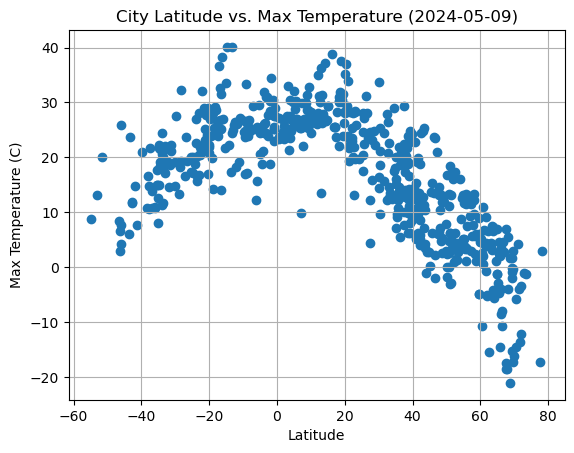

In [24]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature ({formatted_todays_date})")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

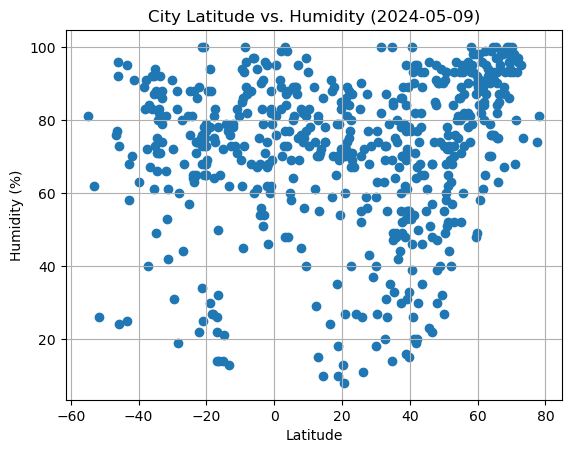

In [25]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({formatted_todays_date})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

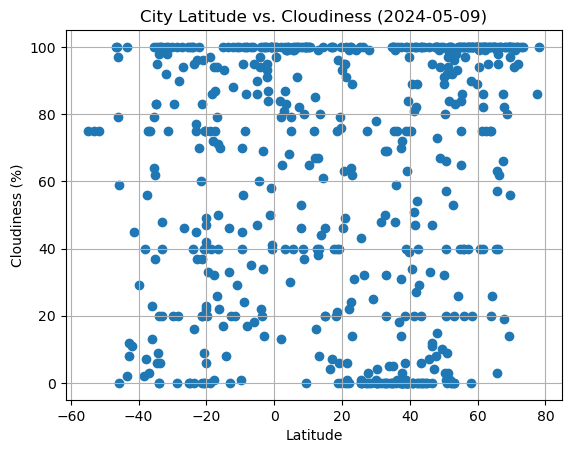

In [26]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({formatted_todays_date})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

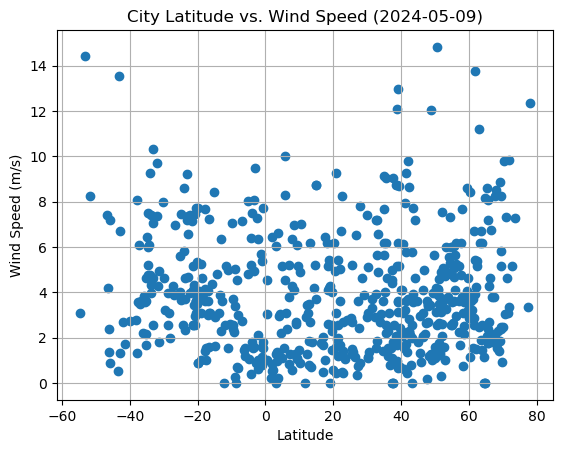

In [27]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({formatted_todays_date})")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

In [28]:
# ####################################################################################################
# ####################################################################################################
# ####################################################################################################
# ####################################################################################################
# ####################################################################################################
# ####################################################################################################
# ####################################################################################################
# ####################################################################################################
# ####################################################################################################
# ####################################################################################################


In [76]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

from scipy import stats

def create_linear_regression_plot(x_values, y_values, x_label, y_label, x_annotate, y_annotate):
#def create_linear_regression_plot(x_values, y_values, x_label, y_label):
    
    # Perform a linear regression on temperature vs. latitude
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
 
    # Get regression values
    regress_values = x_values * slope + intercept
 
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create Plot
    plt.scatter(x_values, y_values, marker="o")
    plt.plot(x_values, regress_values, "r-")
    
    # label the plot , annotate the line equation
    plt.xlabel(x_label)
    plt.ylabel(y_label)
#    plt.annotate(line_eq, (x_annotate, y_annotate), fontsize=15, color="red")
    plt.annotate(line_eq, xy=(x_annotate, y_annotate), xycoords='axes fraction', fontsize=15, color="red")
    
    # Print r value
    print(f"The r-value is: {rvalue**2}")
    
    # Show plot
    plt.show()


In [77]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

northern_hemi_df = city_data_df[ city_data_df["Lat"] >= 0 ].copy()

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


The r-value is: 0.7161472181434125


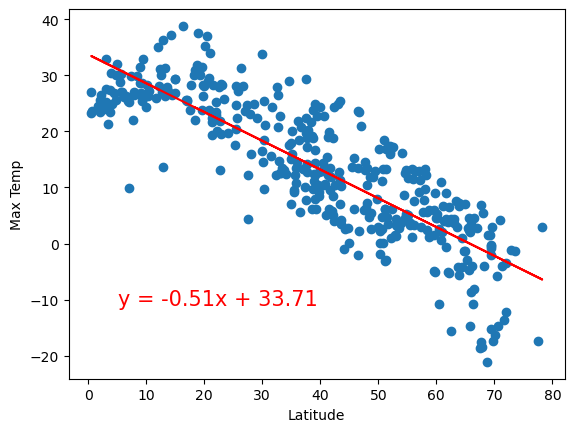

In [78]:
# Create a Scatter Plot for temperature vs latitude
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
x_label = "Latitude"
y_label = "Max Temp"
x_annotate = .1
y_annotate = .2

create_linear_regression_plot(x_values, y_values, x_label, y_label, x_annotate, y_annotate)


In [79]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

southern_hemi_df = city_data_df[ city_data_df["Lat"] < 0 ].copy()

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


The r-value is: 0.4121057168607252


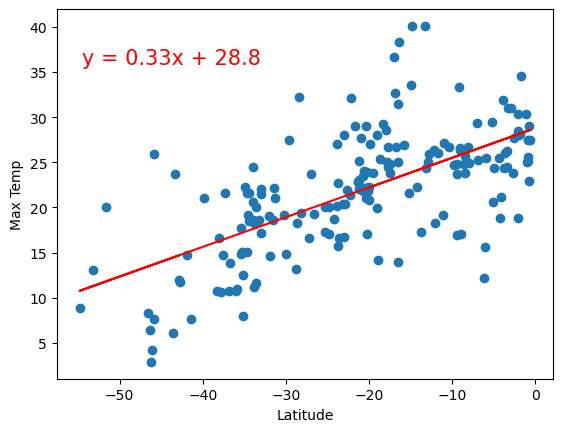

In [80]:

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
x_label = "Latitude"
y_label = "Max Temp"
x_annotate = .05
y_annotate = .85

create_linear_regression_plot(x_values, y_values, x_label, y_label, x_annotate, y_annotate)


In [ ]:
# ####################################################################################################
# ####################################################################################################
# ####################################################################################################
# ####################################################################################################
# ####################################################################################################
# ####################################################################################################
# ####################################################################################################
# ####################################################################################################
# ####################################################################################################
# ####################################################################################################


The r-value is: 0.05689741545789608


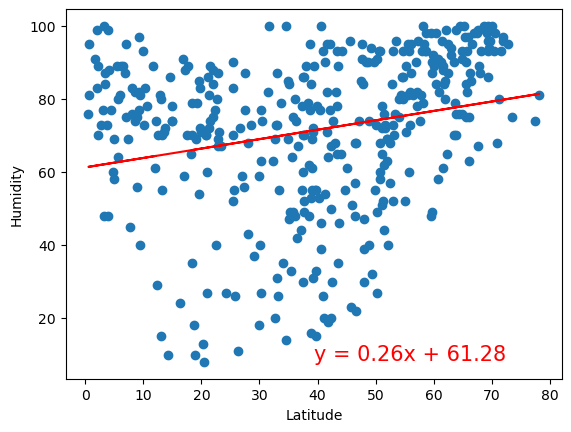

In [85]:
# northern Humidity vs. Latitude

# Create a Scatter Plot for temperature vs latitude
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
x_label = "Latitude"
y_label = "Humidity"
x_annotate = .5
y_annotate = .05

create_linear_regression_plot(x_values, y_values, x_label, y_label, x_annotate, y_annotate)


The r-value is: 0.0002808747046324618


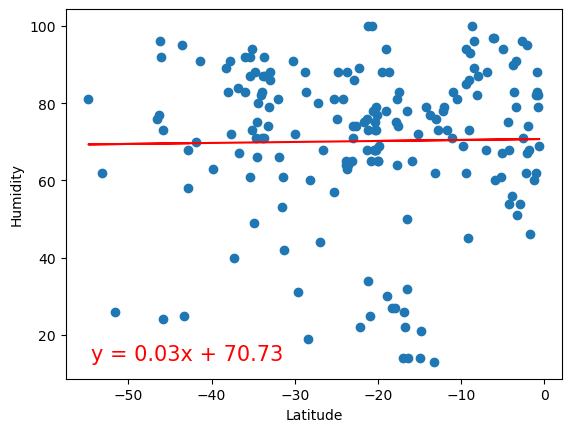

In [87]:
# southern Humidity vs. Latitude

# Create a Scatter Plot for temperature vs latitude
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
x_label = "Latitude"
y_label = "Humidity"
x_annotate = .05
y_annotate = .05

create_linear_regression_plot(x_values, y_values, x_label, y_label, x_annotate, y_annotate)


The r-value is: 0.024026517125811043


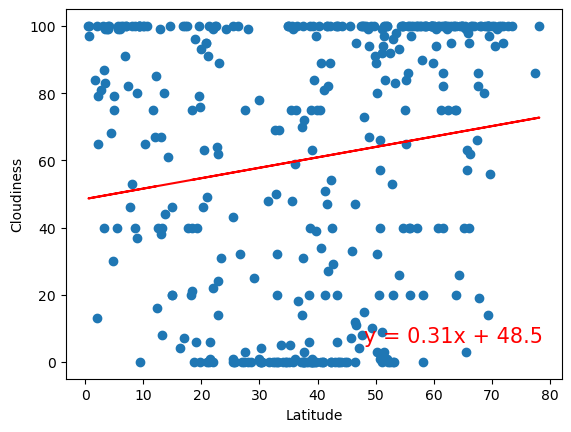

In [90]:
# northern Cloudiness vs. Latitude

# Create a Scatter Plot for Cloudiness vs Latitude
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
x_label = "Latitude"
y_label = "Cloudiness"
x_annotate = .6
y_annotate = .1

create_linear_regression_plot(x_values, y_values, x_label, y_label, x_annotate, y_annotate)


The r-value is: 0.020567354299943663


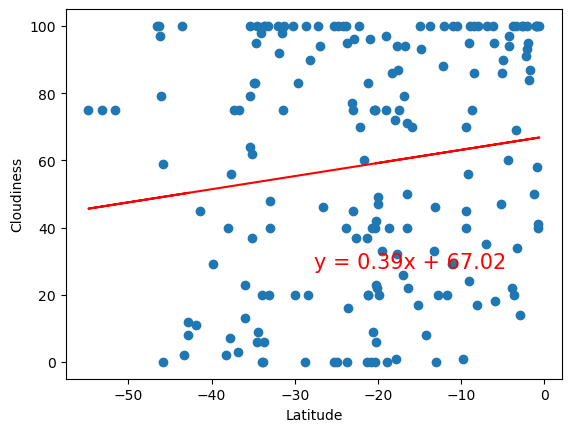

In [92]:
# southern Cloudiness vs. Latitude

# Create a Scatter Plot for Cloudiness vs Latitude
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
x_label = "Latitude"
y_label = "Cloudiness"
x_annotate = .5
y_annotate = .3

create_linear_regression_plot(x_values, y_values, x_label, y_label, x_annotate, y_annotate)


The r-value is: 0.030396762354449484


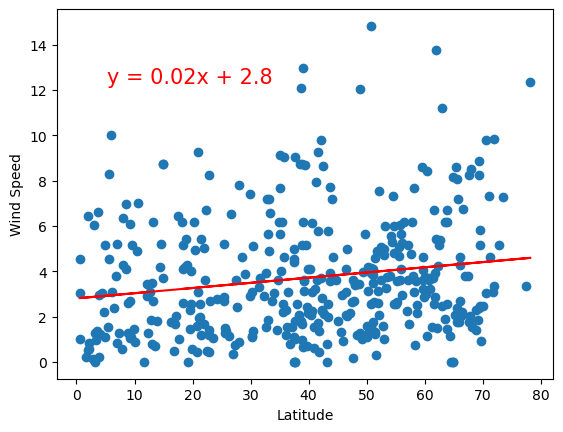

In [95]:
# northern Wind Speed vs. Latitude

# Create a Scatter Plot for Wind Speed vs Latitude
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
x_label = "Latitude"
y_label = "Wind Speed"
x_annotate = .1
y_annotate = .8

create_linear_regression_plot(x_values, y_values, x_label, y_label, x_annotate, y_annotate)


The r-value is: 0.06223904070051575


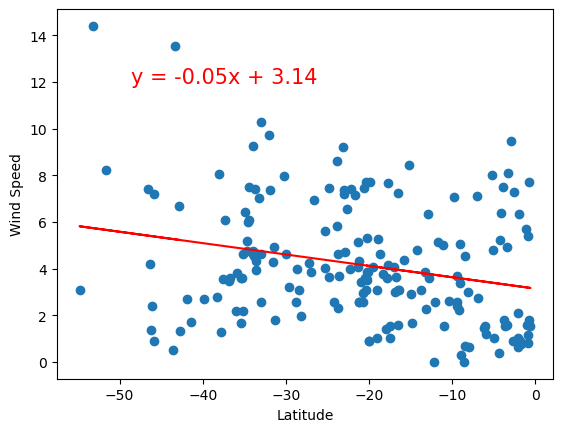

In [98]:
# southern Wind Speed vs. Latitude

# Create a Scatter Plot for Wind Speed vs Latitude
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
x_label = "Latitude"
y_label = "Wind Speed"
x_annotate = .15
y_annotate = .8

create_linear_regression_plot(x_values, y_values, x_label, y_label, x_annotate, y_annotate)


In [ ]:
# ####################################################################################################
# ####################################################################################################
# ####################################################################################################
# ####################################################################################################
# ####################################################################################################
# ####################################################################################################
# ####################################################################################################
# ####################################################################################################
# ####################################################################################################
# ####################################################################################################


# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 623


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = # YOUR CODE HERE

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = # YOUR CODE HERE
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = # YOUR CODE HERE

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = # YOUR CODE HERE
        city_lng = # YOUR CODE HERE
        city_max_temp = # YOUR CODE HERE
        city_humidity = # YOUR CODE HERE
        city_clouds = # YOUR CODE HERE
        city_wind = # YOUR CODE HERE
        city_country = # YOUR CODE HERE
        city_date = # YOUR CODE HERE

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | faya
Processing Record 2 of Set 1 | farsund
Processing Record 3 of Set 1 | new norfolk
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | lanzhou
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | carnarvon
Processing Record 9 of Set 1 | sisimiut
Processing Record 10 of Set 1 | samusu
City not found. Skipping...
Processing Record 11 of Set 1 | saint-pierre
Processing Record 12 of Set 1 | colorado
Processing Record 13 of Set 1 | nikolskoye
Processing Record 14 of Set 1 | trairi
Processing Record 15 of Set 1 | dobryanka
Processing Record 16 of Set 1 | qaanaaq
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | khatanga
Processing Record 19 of Set 1 | tasiilaq
Processing Record 20 of Set 1 | tiksi
Processing Record 21 of Set 1 | puerto ayora
Processing Record 22 of Set 1 | avarua
Processing Record 23 of

Processing Record 33 of Set 4 | belmonte
Processing Record 34 of Set 4 | pisco
Processing Record 35 of Set 4 | ambilobe
Processing Record 36 of Set 4 | aripuana
Processing Record 37 of Set 4 | kaitangata
Processing Record 38 of Set 4 | warqla
City not found. Skipping...
Processing Record 39 of Set 4 | lesnoy
Processing Record 40 of Set 4 | evensk
Processing Record 41 of Set 4 | sur
Processing Record 42 of Set 4 | la ronge
Processing Record 43 of Set 4 | danielskuil
Processing Record 44 of Set 4 | chunhuhub
Processing Record 45 of Set 4 | avera
Processing Record 46 of Set 4 | ouallam
Processing Record 47 of Set 4 | challapata
Processing Record 48 of Set 4 | samalaeulu
City not found. Skipping...
Processing Record 49 of Set 4 | olafsvik
Processing Record 0 of Set 5 | neepawa
Processing Record 1 of Set 5 | freetown
Processing Record 2 of Set 5 | nome
Processing Record 3 of Set 5 | hovd
Processing Record 4 of Set 5 | ugra
Processing Record 5 of Set 5 | upernavik
Processing Record 6 of Set 

Processing Record 25 of Set 8 | torrington
Processing Record 26 of Set 8 | krutikha
Processing Record 27 of Set 8 | bonavista
Processing Record 28 of Set 8 | zaysan
Processing Record 29 of Set 8 | mana
Processing Record 30 of Set 8 | nemuro
Processing Record 31 of Set 8 | mandera
Processing Record 32 of Set 8 | numan
Processing Record 33 of Set 8 | pingliang
Processing Record 34 of Set 8 | saldanha
Processing Record 35 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 36 of Set 8 | vila velha
Processing Record 37 of Set 8 | bengkulu
Processing Record 38 of Set 8 | honiara
Processing Record 39 of Set 8 | pemba
Processing Record 40 of Set 8 | viligili
City not found. Skipping...
Processing Record 41 of Set 8 | ahipara
Processing Record 42 of Set 8 | shingu
Processing Record 43 of Set 8 | bargal
City not found. Skipping...
Processing Record 44 of Set 8 | korla
Processing Record 45 of Set 8 | lerik
Processing Record 46 of Set 8 | quelimane
Processing Record 47 of Set 8 | katyuzhanka
P

Processing Record 14 of Set 12 | nsanje
Processing Record 15 of Set 12 | xuchang
Processing Record 16 of Set 12 | todos santos
Processing Record 17 of Set 12 | kuhestan
City not found. Skipping...
Processing Record 18 of Set 12 | bataipora
Processing Record 19 of Set 12 | tateyama
Processing Record 20 of Set 12 | wajima
Processing Record 21 of Set 12 | pokosnoye
Processing Record 22 of Set 12 | waipawa
Processing Record 23 of Set 12 | yaring
Processing Record 24 of Set 12 | isiro
Processing Record 25 of Set 12 | chivilcoy
Processing Record 26 of Set 12 | mandalgovi
Processing Record 27 of Set 12 | nicoya
Processing Record 28 of Set 12 | novocheremshansk
Processing Record 29 of Set 12 | emirdag
Processing Record 30 of Set 12 | nouadhibou
Processing Record 31 of Set 12 | tongliao
Processing Record 32 of Set 12 | ryomgard
Processing Record 33 of Set 12 | khudumelapye
Processing Record 34 of Set 12 | talcahuano
Processing Record 35 of Set 12 | gifhorn
Processing Record 36 of Set 12 | bilma

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = # YOUR CODE HERE

# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

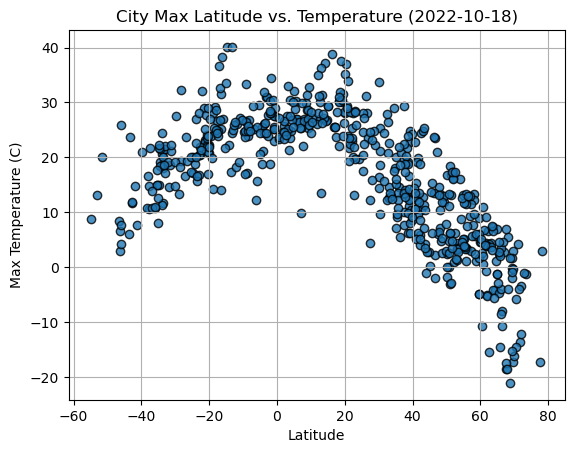

In [8]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

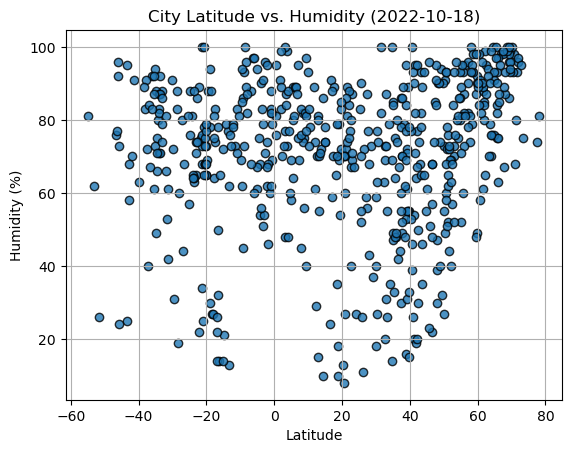

In [9]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

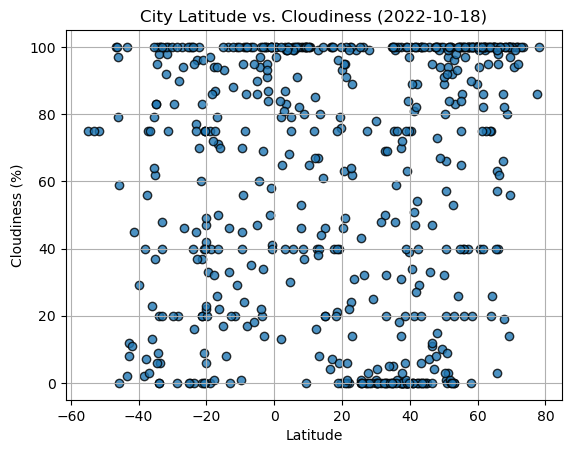

In [10]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

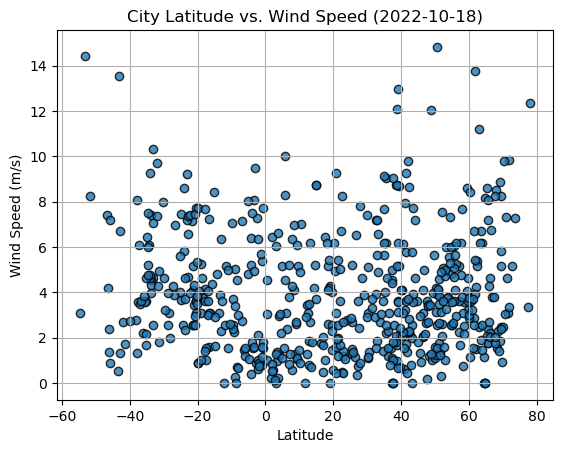

In [11]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7161472181434118


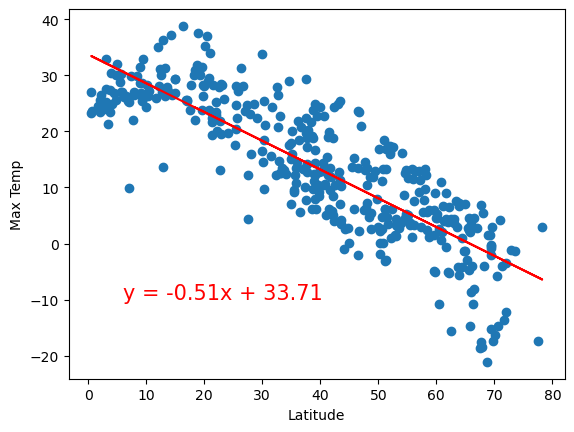

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.4121057168607245


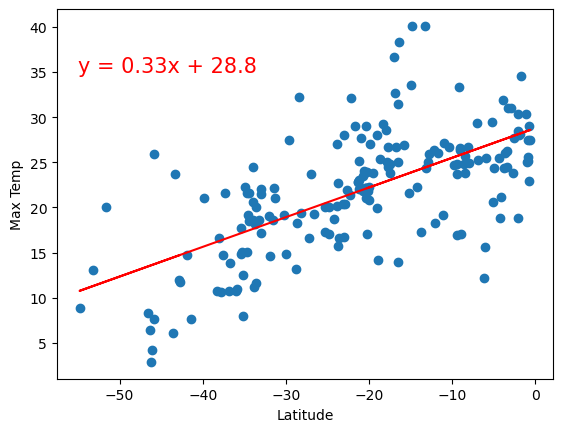

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


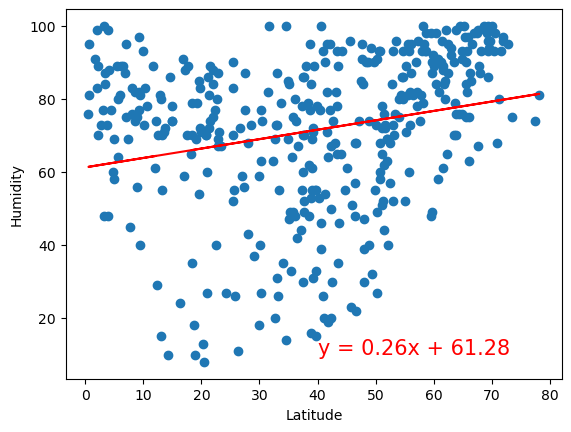

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


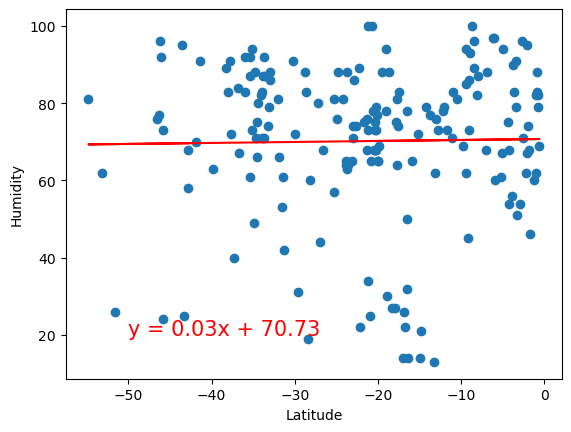

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


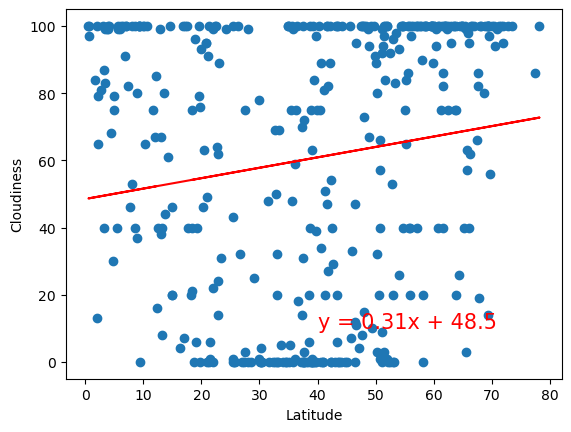

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


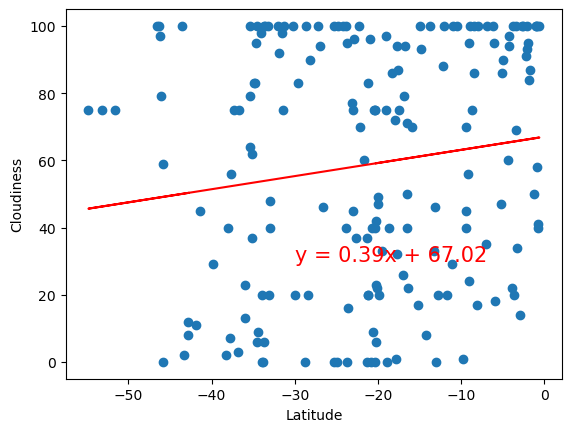

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


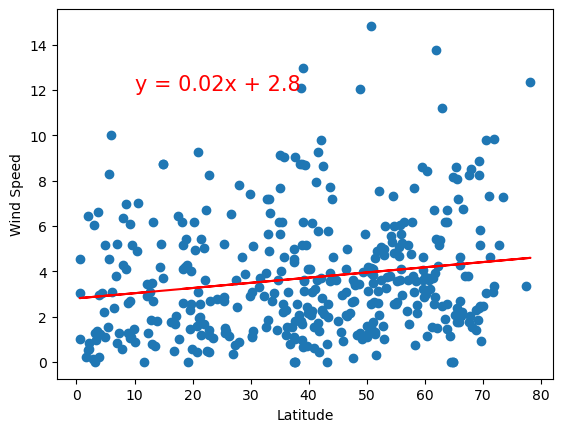

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


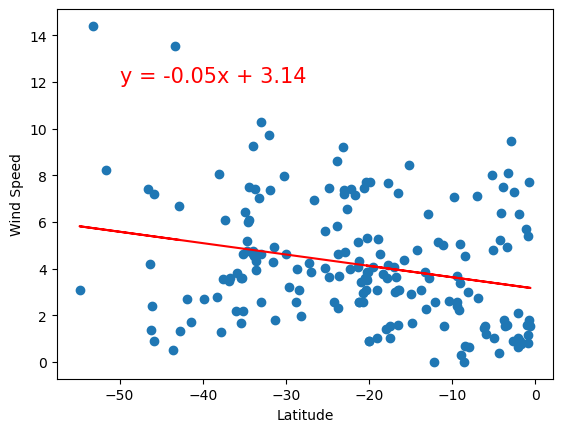

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE